In [2]:
import gudhi

#####################################################################
RipsComplex creation from points
diag= [(0, (0.0, inf)), (0, (0.0, 1.0)), (0, (0.0, 1.0)), (0, (0.0, 1.0))]


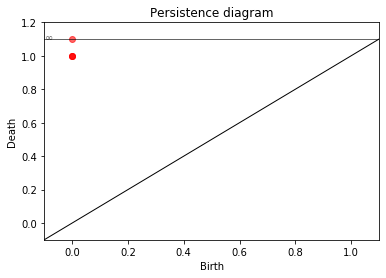

In [3]:
#!/usr/bin/env python

import gudhi

"""This file is part of the Gudhi Library. The Gudhi library
   (Geometric Understanding in Higher Dimensions) is a generic C++
   library for computational topology.

   Author(s):       Marc Glisse

   Copyright (C) 2016 Inria

   This program is free software: you can redistribute it and/or modify
   it under the terms of the GNU General Public License as published by
   the Free Software Foundation, either version 3 of the License, or
   (at your option) any later version.

   This program is distributed in the hope that it will be useful,
   but WITHOUT ANY WARRANTY; without even the implied warranty of
   MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
   GNU General Public License for more details.

   You should have received a copy of the GNU General Public License
   along with this program.  If not, see <http://www.gnu.org/licenses/>.
"""

__author__ = "Marc Glisse"
__copyright__ = "Copyright (C) 2016 Inria"
__license__ = "GPL v3"

print("#####################################################################")
print("RipsComplex creation from points")
rips = gudhi.RipsComplex(points=[[0, 0], [1, 0], [0, 1], [1, 1]],
                         max_edge_length=42)

simplex_tree = rips.create_simplex_tree(max_dimension=1)


diag = simplex_tree.persistence(homology_coeff_field=2, min_persistence=0)
print("diag=", diag)

pplot = gudhi.plot_persistence_diagram(diag)
pplot.show()


In [4]:
#!/usr/bin/env python

import gudhi
import argparse

"""This file is part of the Gudhi Library. The Gudhi library
   (Geometric Understanding in Higher Dimensions) is a generic C++
   library for computational topology.

   Author(s):       Vincent Rouvreau

   Copyright (C) 2016 Inria

   This program is free software: you can redistribute it and/or modify
   it under the terms of the GNU General Public License as published by
   the Free Software Foundation, either version 3 of the License, or
   (at your option) any later version.

   This program is distributed in the hope that it will be useful,
   but WITHOUT ANY WARRANTY; without even the implied warranty of
   MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
   GNU General Public License for more details.

   You should have received a copy of the GNU General Public License
   along with this program.  If not, see <http://www.gnu.org/licenses/>.
"""

__author__ = "Vincent Rouvreau"
__copyright__ = "Copyright (C) 2016 Inria"
__license__ = "GPL v3"

parser = argparse.ArgumentParser(description='RipsComplex creation from '
                                 'points read in a OFF file.',
                                 epilog='Example: '
                                 'example/rips_complex_diagram_persistence_from_off_file_example.py '
                                 '-f ../data/points/tore3D_300.off -a 0.6'
                                 '- Constructs a Rips complex with the '
                                 'points from the given OFF file.')
parser.add_argument("-f", "--file", type=str, required=True)
parser.add_argument("-e", "--max_edge_length", type=float, default=0.5)
parser.add_argument("-d", "--max_dimension", type=int, default=1)
parser.add_argument("-b", "--band", type=float, default=0.)
parser.add_argument('--no-diagram', default=False, action='store_true' , help='Flag for not to display the diagrams')

args = parser.parse_args()

with open(args.file, 'r') as f:
    first_line = f.readline()
    if (first_line == 'OFF\n') or (first_line == 'nOFF\n'):
        print("#####################################################################")
        print("RipsComplex creation from points read in a OFF file")
        
        message = "RipsComplex with max_edge_length=" + repr(args.max_edge_length)
        print(message)
        
        point_cloud = gudhi.read_off(off_file=args.file)
        rips_complex = gudhi.RipsComplex(points=point_cloud, max_edge_length=args.max_edge_length)
        simplex_tree = rips_complex.create_simplex_tree(max_dimension=args.max_dimension)
    
        message = "Number of simplices=" + repr(simplex_tree.num_simplices())
        print(message)
        
        diag = simplex_tree.persistence()
    
        print("betti_numbers()=")
        print(simplex_tree.betti_numbers())
    
        if args.no_diagram == False:
            pplot = gudhi.plot_persistence_diagram(diag, band=args.band)
            pplot.show()
    else:
        print(args.file, "is not a valid OFF file")

    f.close()


/Users/Shouman/Library/Jupyter/runtime/kernel-032bb3a4-35bf-4956-9027-6cc3777e4f85.json is not a valid OFF file


In [1]:
%matplotlib inline
import PersistenceImages.persistence_images as pimg
pers_imager = pimg.PersistenceImager()
print(pers_imager)

PersistenceImager object: 
  pixel size: 0.2 
  resolution: (5, 5) 
  birth range: (0, 1) 
  persistence range: (0, 1) 
  weight: linear_ramp 
  kernel: bvncdf 
  weight parameters: {} 
  kernel parameters: {sigma: [[1. 0.]
 [0. 1.]]}


In [2]:
import numpy as np
pers_dgm = np.array([[0.5, 0.8], [0.7, 1.2], [2.5, 4.0]])
pers_img = pers_imager.transform(pers_dgm, skew=True)


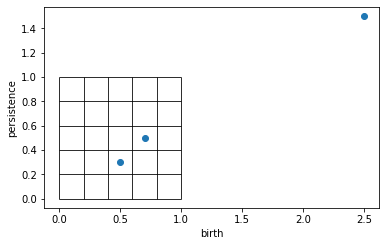

In [3]:
pers_imager.plot_diagram(pers_dgm, skew=True)

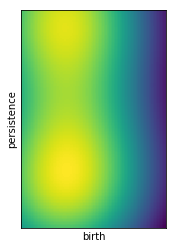

In [20]:
pers_imager.plot_image(pers_dgm, skew=True)

In [5]:
pers_imager.pixel_size = 0.02

In [6]:
print(pers_imager)

PersistenceImager object: 
  pixel size: 0.02 
  resolution: (50, 50) 
  birth range: (0, 1) 
  persistence range: (0, 1) 
  weight: linear_ramp 
  kernel: bvncdf 
  weight parameters: {} 
  kernel parameters: {sigma: [[1. 0.]
 [0. 1.]]}


In [24]:
pers_imager.fit([np.array([[0.5, 0.8], [0.7, 1.2], [2.5, 4.0]]), np.array([[1.2, 2.1], [0.7, 0.9], [1.1, 4.3]])])


In [25]:
len(p)


TypeError: object of type 'NoneType' has no len()

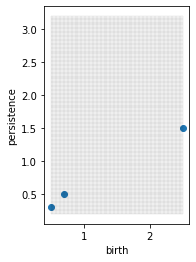

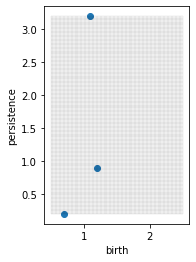

In [22]:
for dgm in [np.array([[0.5, 0.8], [0.7, 1.2], [2.5, 4.0]]), np.array([[1.2, 2.1], [0.7, 0.9], [1.1, 4.3]])]:
    pers_dgm = dgm
    pers_img = pers_imager.transform(dgm, skew=True)
    pers_imager.plot_diagram(dgm, skew=True)
    

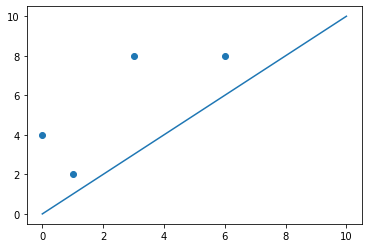

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.kernel_approximation import RBFSampler
from sklearn_tda import *

D = np.array([[0.,4.],[1.,2.],[3.,8.],[6.,8.]])
plt.scatter(D[:,0],D[:,1])
plt.plot([0.,10.],[0.,10.])
plt.show()

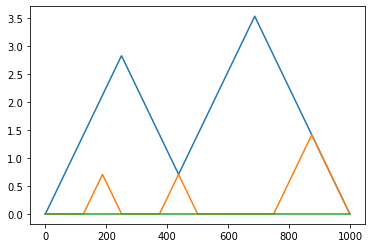

In [27]:
diags = [D]

LS = Landscape(resolution = 1000)
L = LS.fit_transform(diags)
plt.plot(L[0][:1000])
plt.plot(L[0][1000:2000])
plt.plot(L[0][2000:3000])
plt.show()

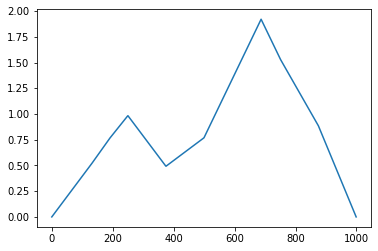

In [28]:
def pow(n):
  return lambda x: np.power(x[1]-x[0],n)

SH = Silhouette(resolution=1000, weight=pow(2))
sh = SH.fit_transform(diags)
plt.plot(sh[0])
plt.show()

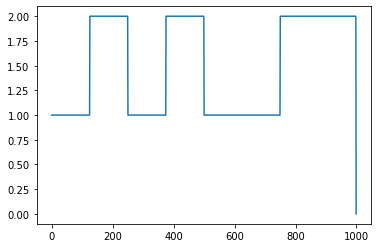

In [29]:
BC = BettiCurve(resolution=1000)
bc = BC.fit_transform(diags)
plt.plot(bc[0])
plt.show()

In [30]:
CP = ComplexPolynomial(threshold=-1, F="T")
cp = CP.fit_transform(diags)
print("Complex polynomial is " + str(cp[0,:]))


Complex polynomial is [  4.31020911 +3.78255248j   0.62602147+17.72198117j
 -14.03266655+14.19824852j  -9.38453999 +3.45404244j]


In [31]:
TV = TopologicalVector(threshold=-1)
tv = TV.fit_transform(diags)
print("Topological vector is " + str(tv[0,:]))


Topological vector is [2.  1.  1.  0.5]


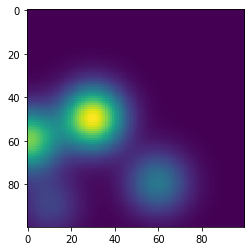

In [32]:
diagsT = DiagramPreprocessor(use=True, scalers=[([0,1], BirthPersistenceTransform())]).fit_transform(diags)
PI = PersistenceImage(bandwidth=1., weight=lambda x: x[1], im_range=[0,10,0,10], resolution=[100,100])
pi = PI.fit_transform(diagsT)
plt.imshow(np.flip(np.reshape(pi[0], [100,100]), 0))
plt.show()

In [13]:
# https://persim.scikit-tda.org/notebooks/Classification%20with%20persistence%20images.html

#%pip install ripser
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from ripser import Rips
from persim import PersImage

N = 200
N_per_class = int(N / 2)
N_in_class = 400

def noise(N, scale):
    return scale * np.random.random((N, 2))

def circle(N, scale, offset):
    return offset + scale * datasets.make_circles(n_samples=N, factor=0.4, noise=0.05)[0]

just_noise = [noise(N_in_class, 150) for _ in range(N_per_class)]

half = int(N_in_class / 2)
with_circle = [np.concatenate((circle(half, 150, 70), noise(half, 150)))
               for _ in range(N_per_class)]

datas = []
datas.extend(just_noise)
datas.extend(with_circle)

# Define labels
labels = np.zeros(N)
labels[N_per_class:] = 1

Note: you may need to restart the kernel to use updated packages.


In [14]:
rips = Rips(maxdim=1, coeff=2)
diagrams = [rips.fit_transform(data) for data in datas]
diagrams_h1 = [rips.fit_transform(data)[1] for data in datas]

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


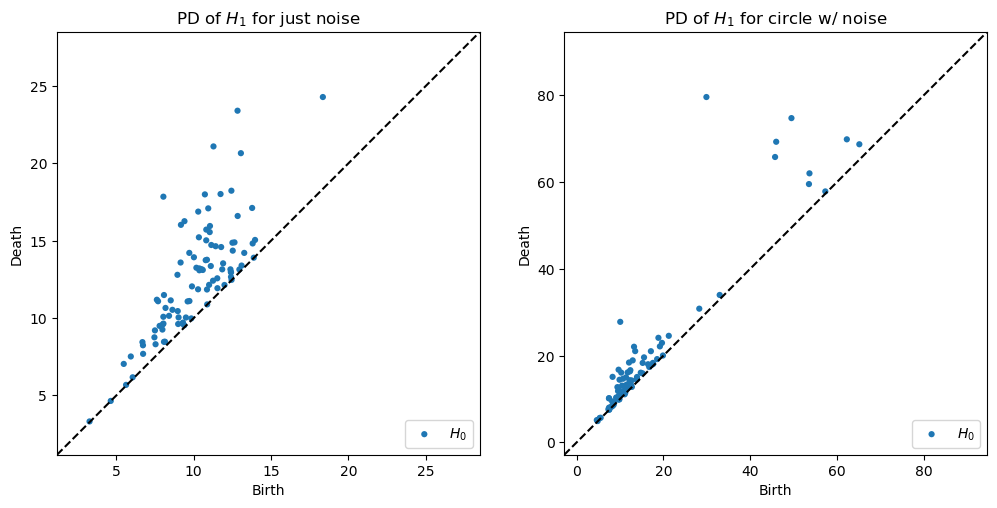

In [15]:
plt.figure(figsize=(12,6))
plt.subplot(121)

rips.plot(diagrams_h1[0], show=False)
plt.title("PD of $H_1$ for just noise")

plt.subplot(122)
rips.plot(diagrams_h1[-1], show=False)
plt.title("PD of $H_1$ for circle w/ noise")

plt.show()

In [16]:
pim = PersImage(pixels=[20,20], spread=1)
imgs = pim.transform(diagrams_h1)


PersImage(pixels=[20, 20], spread=1, specs=None, kernel_type="gaussian", weighting_type="linear")


In [17]:
imgs_array = np.array([img.flatten() for img in imgs])

In [18]:
imgs_array.shape

(200, 400)

In [19]:
imgs

[array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.000000

In [20]:
datas[0]

array([[ 90.64482161,  47.72059032],
       [ 20.27630756, 132.24116571],
       [ 12.67542818,  30.92144763],
       [110.14378336,  59.10132688],
       [111.70806697,  97.83861111],
       [149.92685809, 100.27068069],
       [ 70.97272342,  33.11576114],
       [ 74.95260279, 142.23585833],
       [ 38.81738468, 136.85500456],
       [ 38.62064369,  74.07950371],
       [ 32.46605603, 132.60818483],
       [ 46.36475151,   3.55750933],
       [  0.47307162,  52.54743243],
       [ 11.95229375,   5.39071829],
       [134.89132155,  49.24920115],
       [ 29.55057889,   2.33764424],
       [ 15.50621881,  23.40045477],
       [ 42.27344548,  98.3586641 ],
       [116.03369206,  48.02358627],
       [133.72280784,  77.64219923],
       [105.98121829, 121.42520358],
       [116.10881545, 130.68261478],
       [ 27.77311851,  58.14350031],
       [ 79.84143665, 102.16220614],
       [ 86.84098208,  37.59710886],
       [148.12358721, 131.12997634],
       [143.36778258,  82.51886091],
 

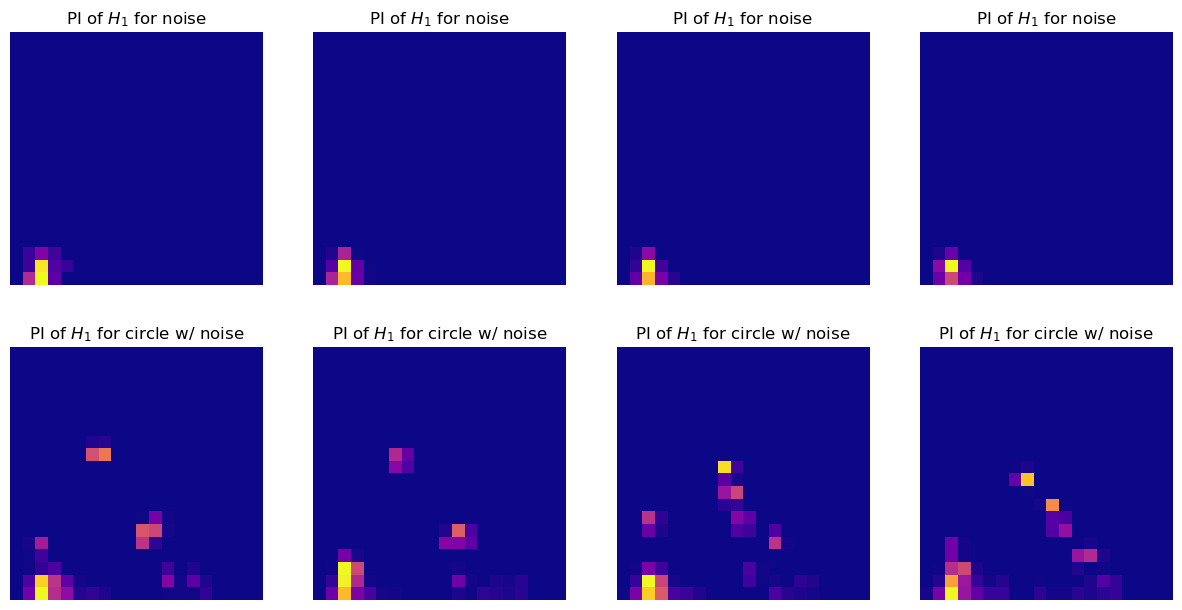

In [21]:
plt.figure(figsize=(15,7.5))

for i in range(4):
    ax = plt.subplot(240+i+1)
    pim.show(imgs[i], ax)
    plt.title("PI of $H_1$ for noise")

for i in range(4):
    ax = plt.subplot(240+i+5)
    pim.show(imgs[-(i+1)], ax)
    plt.title("PI of $H_1$ for circle w/ noise")

In [22]:
X_train, X_test, y_train, y_test = train_test_split(imgs_array, labels, test_size=0.40, random_state=42)

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

lr.score(X_test, y_test)

/Users/Shouman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1.0

In [19]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
sequence_length = 28
input_size = 28
hidden_size = 128
num_layers = 2
num_classes = 10
batch_size = 100
num_epochs = 2
learning_rate = 0.003

In [20]:
train_dataset = torchvision.datasets.MNIST(root='../../data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data/',
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)


In [6]:
type(train_dataset)

torchvision.datasets.mnist.MNIST

In [7]:
# Bidirectional recurrent neural network (many-to-one)
class BiRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(BiRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size*2, num_classes)  # 2 for bidirection
    
    def forward(self, x):
        # Set initial states
        h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) # 2 for bidirection 
        c0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device)
        
        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))  # out: tensor of shape (batch_size, seq_length, hidden_size*2)
        
        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])
        return out

model = BiRNN(input_size, hidden_size, num_layers, num_classes).to(device)


# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [8]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, sequence_length, input_size).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))


Epoch [1/2], Step [100/600], Loss: 0.6944
Epoch [1/2], Step [200/600], Loss: 0.4290
Epoch [1/2], Step [300/600], Loss: 0.1785
Epoch [1/2], Step [400/600], Loss: 0.2112
Epoch [1/2], Step [500/600], Loss: 0.1057
Epoch [1/2], Step [600/600], Loss: 0.1947
Epoch [2/2], Step [100/600], Loss: 0.1298
Epoch [2/2], Step [200/600], Loss: 0.1735
Epoch [2/2], Step [300/600], Loss: 0.0970
Epoch [2/2], Step [400/600], Loss: 0.1046
Epoch [2/2], Step [500/600], Loss: 0.0202
Epoch [2/2], Step [600/600], Loss: 0.0552


In [16]:
train_loader(0)

TypeError: 'DataLoader' object is not callable

In [17]:
import os
print(os.getcwd())

/Users/Shouman/TedTalkTDA/Code
